In [2]:
import pandas as pd

link = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(link)
df.head(10)


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110.0,5500.0,19,25,15250.0,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,17710.0,12.368421,Medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,18920.0,12.368421,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,8.3,140.0,5500.0,17,20,23875.0,13.823529,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,8.8,101.0,5800.0,23,29,16430.0,10.217391,Low,0,1


In [3]:
#correlation

df.corr

<bound method DataFrame.corr of      symboling  normalized-losses         make aspiration num-of-doors  \
0            3                122  alfa-romero        std          two   
1            3                122  alfa-romero        std          two   
2            1                122  alfa-romero        std          two   
3            2                164         audi        std         four   
4            2                164         audi        std         four   
..         ...                ...          ...        ...          ...   
196         -1                 95        volvo        std         four   
197         -1                 95        volvo      turbo         four   
198         -1                 95        volvo        std         four   
199         -1                 95        volvo      turbo         four   
200         -1                 95        volvo      turbo         four   

      body-style drive-wheels engine-location  wheel-base    length  ...  \
0  

In [4]:
df[['engine-size', 'horsepower', 'price']].corr()

,engine-size,horsepower,price
engine-size,1.000000,0.822676,0.872335
horsepower,0.822676,1.000000,0.809575
price,0.872335,0.809575,1.000000


In [5]:
# Pearson Method

from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])

print ('Pearson Coef is', pearson_coef, 'and P_Value is', p_value )




Pearson Coef is 0.8723351674455185 and P_Value is 9.265491622198389e-64


In [7]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])

print ('Pearson Coef is', pearson_coef, 'and P_Value is', p_value )


Pearson Coef is 0.8095745670036559 and P_Value is 6.369057428260101e-48


In [8]:
pearson_coef, p_value = stats.pearsonr(df['symboling'], df['price'])

print ('Pearson Coef is', pearson_coef, 'and P_Value is', p_value )


Pearson Coef is -0.08239118716962357 and P_Value is 0.2449148765716521


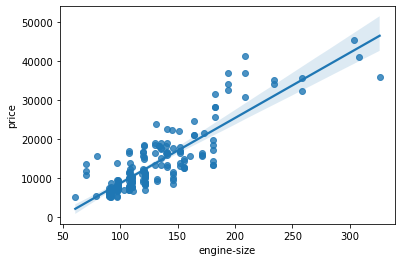

In [10]:
#To visualise the corr. between the engine-size and price 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.regplot(x = 'engine-size', y = 'price', data = df)

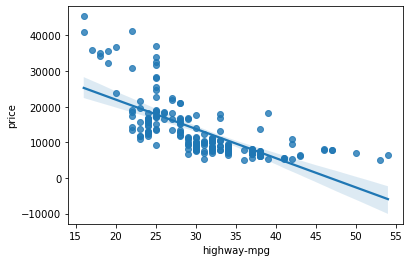

In [11]:
sns.regplot(x = 'highway-mpg', y = 'price', data = df)

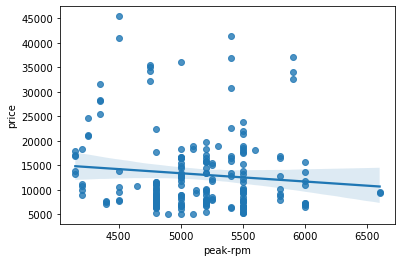

In [12]:
sns.regplot(x = 'peak-rpm', y = 'price', data = df)

Result above shows a weak correlation.

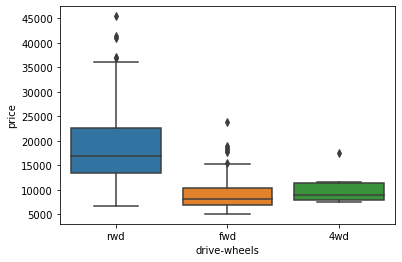

In [13]:
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)

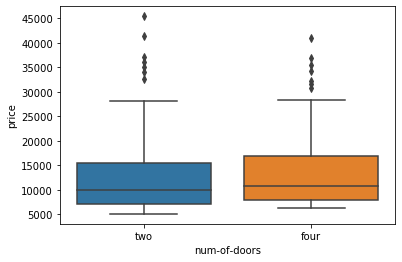

In [14]:
sns.boxplot(x = 'num-of-doors', y = 'price', data = df)

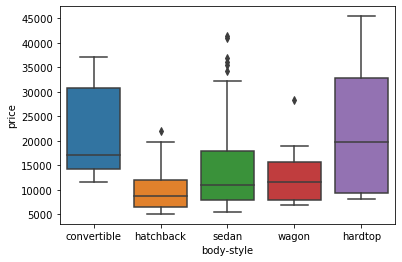

In [15]:
sns.boxplot(x = 'body-style', y = 'price', data = df)

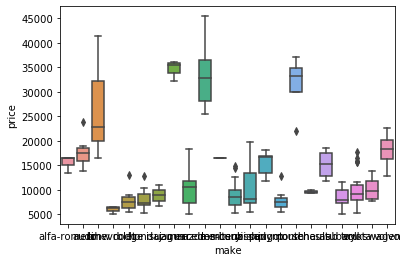

In [16]:
sns.boxplot(x = 'make', y = 'price', data = df)

Blurry, not so useful.

In [21]:
#groupby

df2 = df[['drive-wheels', 'num-of-doors', 'price']]

df2_group = df2.groupby(['drive-wheels', 'num-of-doors'], as_index = False).mean()

df2_group

,drive-wheels,num-of-doors,price
0,4wd,four,10617.857143
1,4wd,two,7603.000000
2,fwd,four,9789.072464
3,fwd,two,8478.326531
4,rwd,four,20577.000000
5,rwd,two,18869.944444


In [22]:
pivot2 = df2_group.pivot(index = 'drive-wheels', columns = 'num-of-doors')

pivot2

#index means row

price              
num-of-doors          four           two
drive-wheels                            
4wd           10617.857143   7603.000000
fwd            9789.072464   8478.326531
rwd           20577.000000  18869.944444

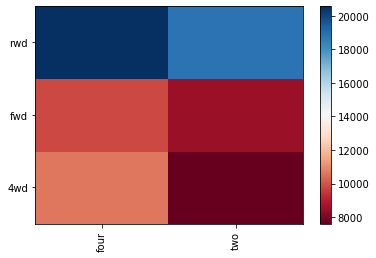

In [23]:
import numpy as np


fig, ax = plt.subplots()
im = ax.pcolor(pivot2, cmap='RdBu')

#label names
row_labels = pivot2.columns.levels[1]
col_labels = pivot2.index

#move ticks and labels to the center
ax.set_xticks(np.arange(pivot2.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivot2.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()


In [24]:
df3 = df[['drive-wheels', 'body-style', 'price']]

df3_group = df3.groupby(['drive-wheels', 'body-style'], as_index = False).mean()

df3_group

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [25]:
pivot3 = df3_group.pivot(index = 'drive-wheels', columns = 'body-style')

pivot3

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

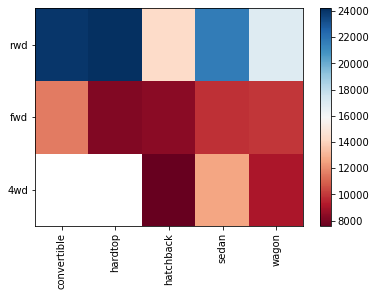

In [26]:
import numpy as np


fig, ax = plt.subplots()
im = ax.pcolor(pivot3, cmap='RdBu')

#label names
row_labels = pivot3.columns.levels[1]
col_labels = pivot3.index

#move ticks and labels to the center
ax.set_xticks(np.arange(pivot3.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivot3.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()